In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm

In [93]:
# https://www.ue.katowice.pl/fileadmin/_migrated/content_uploads/7_B.Fraczek_Analiza_Czynnikow....pdf
df = pd.read_excel("datasets/cleaned.xlsx", sheet_name = ["Polska"])["Polska"]
df = df.fillna(df.mean())

In [94]:
df.set_index("Rok", inplace=True)

In [95]:
# Kolumny z odpowiednią wartością wariancji 
cols = df.columns[df.std() / df.mean() > 0.2].values
cols: list = cols.tolist()
#cols.remove("Procent dochodu rozporządzalnego przeznaczany na oszczędności")

In [105]:
cols

['Procent dochodu rozporządzalnego przeznaczany na oszczędności',
 'Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów',
 'Zmiana dochodu rozporządzalnego względem roku poprzeniego wyrażona w procentach',
 'Zmiana sumy przeznaczanej na konsumpcję przez gospodarstwa domowe',
 'Rezerwy ubezpieczeń na życie (wyrażone w procetach zobowiązań, których pokrycie w środkach muszą posiadać ubezpieczyciele)',
 'Suma aktyw gospodarstw domowych w dolarach per capita',
 'Przeciętne roczne wynagrodzenie (dane z ZUSu)',
 'Średnie stopy procentowe w danym roku',
 'Cena 1 m2 powierzchni użytkowej budynku mieszkalnego oddanego do użytkowania',
 'Średnia stopa bezrobocia',
 'Cena: olej jadalny rafinowany rzepakowy konfekcjonowany - za 1l']

In [96]:
from scipy.stats import t

alpha = 0.05
N = len(df)
t = t.ppf(1 - alpha, N-2)
r = np.sqrt(t**2/(t**2 + N - 2))
r

0.36873700336416443

In [97]:
corr = df[cols].corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

/tmp/ipykernel_66616/323351926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  links_filtered.loc[:,"value"] = np.round(links_filtered.loc[:,"value"], 3)


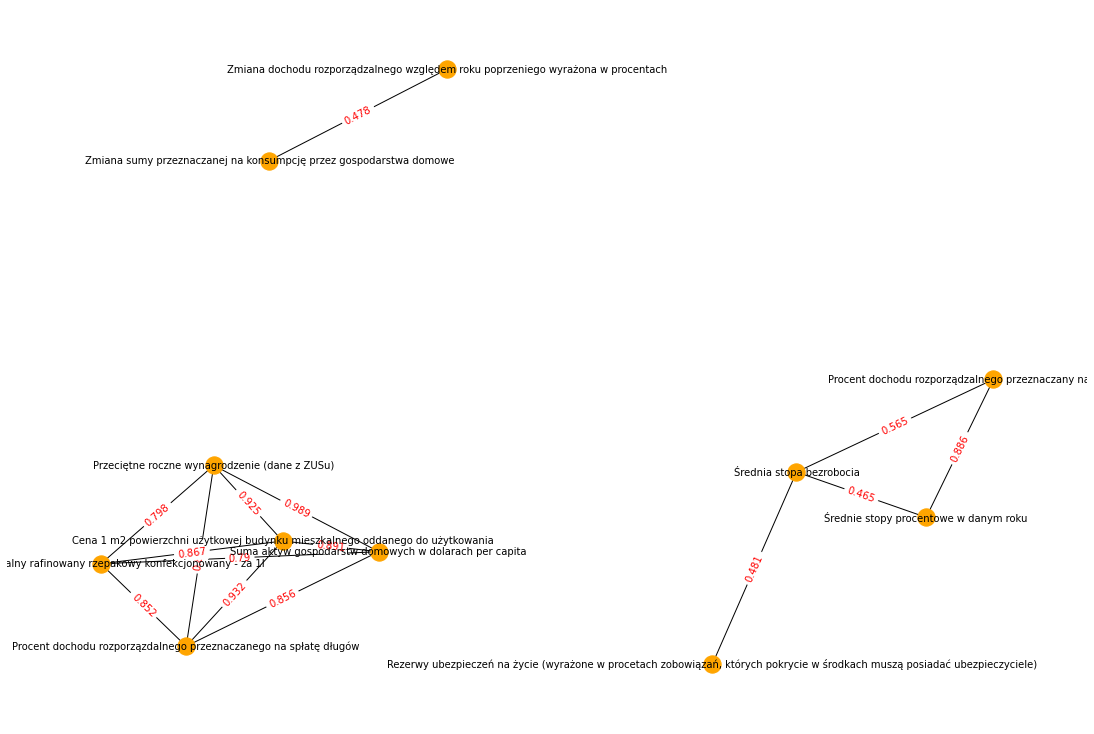

In [98]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > r) & (links['var1'] != links['var2']) ]
links_filtered.loc[:,"value"] = np.round(links_filtered.loc[:,"value"], 3)
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
pos = nx.spring_layout(G, k= 1)
 
# Plot the network:
plt.figure(figsize=(15, 10))
nx.draw(G,pos, with_labels=True, node_color='orange', edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.show()

In [107]:
cols

['Procent dochodu rozporządzalnego przeznaczany na oszczędności',
 'Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów',
 'Zmiana dochodu rozporządzalnego względem roku poprzeniego wyrażona w procentach',
 'Zmiana sumy przeznaczanej na konsumpcję przez gospodarstwa domowe',
 'Rezerwy ubezpieczeń na życie (wyrażone w procetach zobowiązań, których pokrycie w środkach muszą posiadać ubezpieczyciele)',
 'Suma aktyw gospodarstw domowych w dolarach per capita',
 'Przeciętne roczne wynagrodzenie (dane z ZUSu)',
 'Średnie stopy procentowe w danym roku',
 'Cena 1 m2 powierzchni użytkowej budynku mieszkalnego oddanego do użytkowania',
 'Średnia stopa bezrobocia',
 'Cena: olej jadalny rafinowany rzepakowy konfekcjonowany - za 1l']

In [197]:
#best = ["Średnia stopa bezrobocia", 'Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów']
df["const"] = 1
best = ["Średnie stopy procentowe w danym roku", "Cena: olej jadalny rafinowany rzepakowy konfekcjonowany - za 1l", "const"]

In [198]:
X = df.loc[:, best]
y = df.loc[:, "Procent dochodu rozporządzalnego przeznaczany na oszczędności"]

In [199]:
df.loc[:, ["Procent dochodu rozporządzalnego przeznaczany na oszczędności"] + best]

,Procent dochodu rozporządzalnego przeznaczany na oszczędności,Średnie stopy procentowe w danym roku,Cena: olej jadalny rafinowany rzepakowy konfekcjonowany - za 1l,const
Rok,,,,
1999,9.946499,16.444444,3.30,1
2000,10.153177,20.416667,2.72,1
2001,11.655554,16.181818,2.59,1
2002,8.270142,8.593750,2.36,1
2003,7.302362,6.137500,2.61,1
2004,2.495094,6.208333,3.38,1
2005,1.806936,5.437500,3.23,1
2006,2.051941,4.187500,3.22,1
2007,1.739163,4.687500,3.63,1


In [200]:
model = sm.OLS(y, X)

In [201]:
results = model.fit()
print(results.summary2())

                                        Results: Ordinary least squares
Model:               OLS                                                           Adj. R-squared:     0.857   
Dependent Variable:  Procent dochodu rozporządzalnego przeznaczany na oszczędności AIC:                78.6878 
Date:                2022-05-28 18:12                                              BIC:                81.8213 
No. Observations:    21                                                            Log-Likelihood:     -36.344 
Df Model:            2                                                             F-statistic:        60.88   
Df Residuals:        18                                                            Prob (F-statistic): 9.75e-09
R-squared:           0.871                                                         Scale:              2.1762  
---------------------------------------------------------------------------------------------------------------
                                

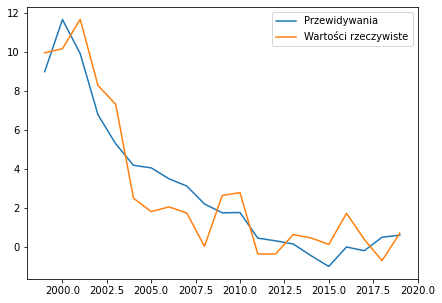

In [207]:
plt.figure(figsize=(7,5))
plt.plot(results.predict(X))
plt.plot(y)
plt.legend(["Przewidywania", "Wartości rzeczywiste"])
plt.show()